# Reading Data

In [51]:
import torch

data = torch.load('./Data/Features/vit_b_16_features.pt')
for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (60000, 768) (60000,)
Test Data (X, y):  (10000, 768) (10000,)


# Data Splitting

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data['train'][0], data['train'][1], test_size = 5000, stratify = data['train'][1], random_state = 10)
data['train'] = [X_train, y_train] 
data['val'] = [X_val, y_val]

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 768) (55000,)
Test Data (X, y):  (10000, 768) (10000,)
Val Data (X, y):  (5000, 768) (5000,)


# Data Transformation

## PCA

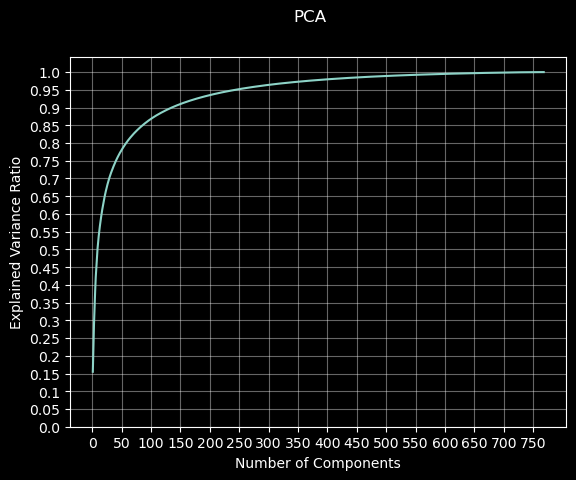

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data['train'][0])
explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratios)+1), explained_variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.suptitle('PCA')
plt.yticks(np.array(range(0, 105, 5))/100, np.array(range(0, 105, 5))/100)
plt.xticks(range(0, len(explained_variance_ratios)+1, 50), range(0, len(explained_variance_ratios)+1, 50))
plt.grid(True, alpha=0.4)
plt.show()

Based on this plot we can see that with 250 components we are able to explain about 95% of our variance.  
So, we will transform our data using n_components = 250

In [54]:
pca = PCA(n_components=250)
data['train'][0] = pca.fit_transform(data['train'][0])
data['val'][0] = pca.transform(data['val'][0])
data['test'][0] = pca.transform(data['test'][0])

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 250) (55000,)
Test Data (X, y):  (10000, 250) (10000,)
Val Data (X, y):  (5000, 250) (5000,)


## Normalization

In [55]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler().fit(data['train'][0])
data['train'][0] = normalizer.transform(data['train'][0])
data['val'][0] = normalizer.transform(data['val'][0])
data['test'][0] = normalizer.transform(data['test'][0])

## ANOVA Test

In [56]:
# from sklearn.feature_selection import SelectPercentile, f_classif

# top_features = SelectPercentile(f_classif, percentile=90).fit_transform(*data['train'])
# top_features.shape

# EDA

In [57]:
# TODO
# Plot examples of each class

In [58]:
import pandas as pd

X_df = pd.DataFrame(data['train'][0])
y_df = pd.DataFrame(data['train'][1])

X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
count,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,...,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
mean,-1.442649e-08,7.768111e-09,-1.192960e-08,-1.068115e-08,-2.496893e-09,-8.322976e-10,-1.477328e-08,6.970492e-09,1.525879e-09,-1.095859e-08,...,-6.380948e-09,3.814697e-10,-8.600408e-09,2.774325e-09,6.380948e-09,-1.061179e-08,1.581365e-08,-5.756725e-09,-1.075051e-08,-1.789440e-08
std,1.000006e+00,1.000010e+00,1.000005e+00,1.000009e+00,1.000005e+00,1.000008e+00,1.000004e+00,1.000007e+00,1.000003e+00,1.000006e+00,...,1.000005e+00,1.000004e+00,1.000005e+00,1.000005e+00,1.000004e+00,1.000004e+00,1.000008e+00,1.000008e+00,1.000003e+00,1.000006e+00
min,-1.593896e+00,-2.473112e+00,-2.544337e+00,-2.633596e+00,-2.767797e+00,-2.424212e+00,-3.324727e+00,-3.164393e+00,-3.462825e+00,-3.557741e+00,...,-5.681306e+00,-5.282034e+00,-4.888677e+00,-5.673494e+00,-5.214989e+00,-5.529663e+00,-5.628921e+00,-4.796171e+00,-4.911826e+00,-5.104701e+00
25%,-8.725563e-01,-7.508740e-01,-8.234814e-01,-7.608685e-01,-7.351125e-01,-6.748389e-01,-6.895314e-01,-6.274343e-01,-6.588933e-01,-6.989872e-01,...,-6.303640e-01,-6.354160e-01,-6.281393e-01,-6.276533e-01,-6.260556e-01,-6.266757e-01,-6.337141e-01,-6.355130e-01,-6.379153e-01,-6.306135e-01
50%,-1.974188e-01,-8.271967e-02,4.734412e-02,7.797884e-02,-2.704923e-02,-1.181899e-01,2.363956e-03,-6.064781e-02,3.978926e-02,-5.970365e-03,...,6.844883e-03,-2.297155e-03,1.091165e-03,-1.375376e-02,-3.222626e-03,4.274188e-04,-4.996900e-03,-3.331102e-03,-2.078683e-03,1.235203e-03
75%,8.396313e-01,6.157252e-01,7.392416e-01,7.542422e-01,7.321005e-01,4.984861e-01,6.588440e-01,6.037422e-01,6.945030e-01,7.074607e-01,...,6.374287e-01,6.251082e-01,6.284153e-01,6.172374e-01,6.226820e-01,6.337180e-01,6.290461e-01,6.333268e-01,6.341119e-01,6.324504e-01
max,2.335469e+00,2.909888e+00,2.635108e+00,2.714828e+00,2.976884e+00,3.974512e+00,3.803464e+00,3.678920e+00,3.503984e+00,3.784819e+00,...,5.993358e+00,5.544674e+00,6.184825e+00,5.682203e+00,5.273971e+00,5.768510e+00,6.735686e+00,6.043632e+00,6.721734e+00,5.201667e+00


As we can see, our columns are 0 mean and have a standard deviation of 1.

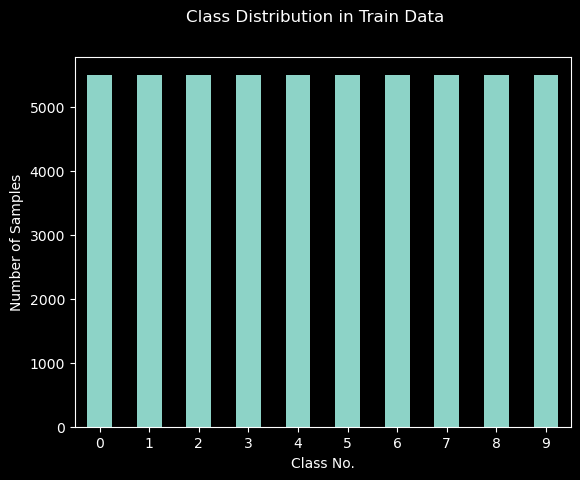

In [59]:
y_df.value_counts().plot(kind='bar')
plt.suptitle('Class Distribution in Train Data')
plt.xlabel('Class No.')
plt.ylabel('Number of Samples')
plt.xticks(range(0, 10), range(0, 10), rotation=0)
plt.show()

Equal samples of each class

# Models

## Gaussian Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB().fit(*data['train'])

train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      5500
         1.0       1.00      0.85      0.92      5500
         2.0       0.79      0.71      0.75      5500
         3.0       0.79      0.75      0.77      5500
         4.0       0.75      0.73      0.74      5500
         5.0       0.83      0.94      0.88      5500
         6.0       0.58      0.50      0.54      5500
         7.0       0.91      0.87      0.89      5500
         8.0       0.67      0.96      0.79      5500
         9.0       0.95      0.88      0.91      5500

    accuracy                           0.79     55000
   macro avg       0.80      0.79      0.79     55000
weighted avg       0.80      0.79      0.79     55000



In [61]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       500
         1.0       1.00      0.84      0.91       500
         2.0       0.81      0.72      0.76       500
         3.0       0.81      0.77      0.79       500
         4.0       0.74      0.75      0.74       500
         5.0       0.83      0.95      0.88       500
         6.0       0.56      0.48      0.52       500
         7.0       0.90      0.88      0.89       500
         8.0       0.66      0.96      0.78       500
         9.0       0.95      0.86      0.91       500

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



## Nearest Neighbour

100%|██████████| 29/29 [00:40<00:00,  1.40s/it]


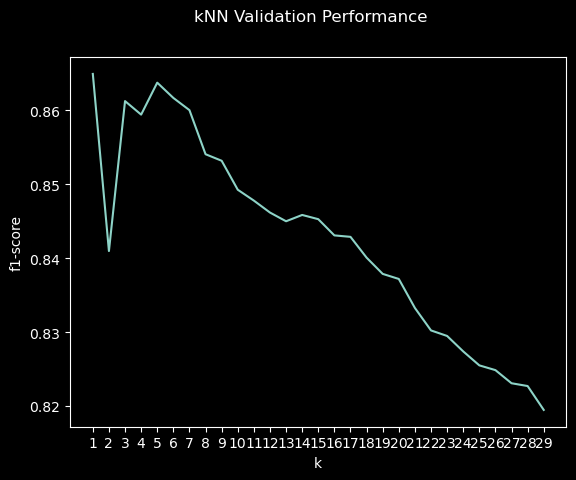

In [62]:
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

f1_scores = []
for k in tqdm(range(1, 30)):
    clf = KNeighborsClassifier(k).fit(*data['train'])
    score = f1_score(data['val'][1], clf.predict(data['val'][0]), average='macro')
    f1_scores.append(score)

plt.plot(range(1, 30), f1_scores)
plt.xticks(range(1, 30), range(1, 30))
plt.xlabel('k')
plt.ylabel('f1-score')
plt.suptitle('kNN Validation Performance')
plt.show()

As we can see, we acheived the best validation f1 score with k=1

In [63]:
clf = KNeighborsClassifier(n_neighbors=1).fit(*data['train'])
train_preds = clf.predict(data['train'][0])
val_preds = clf.predict(data['val'][0])

print('Train Metrics')
print(classification_report(data['train'][1], train_preds))

Train Metrics
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500
         2.0       1.00      1.00      1.00      5500
         3.0       1.00      1.00      1.00      5500
         4.0       1.00      1.00      1.00      5500
         5.0       1.00      1.00      1.00      5500
         6.0       1.00      1.00      1.00      5500
         7.0       1.00      1.00      1.00      5500
         8.0       1.00      1.00      1.00      5500
         9.0       1.00      1.00      1.00      5500

    accuracy                           1.00     55000
   macro avg       1.00      1.00      1.00     55000
weighted avg       1.00      1.00      1.00     55000



In [64]:
print('Val Metrics')
print(classification_report(data['val'][1], val_preds))

Val Metrics
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       500
         1.0       0.94      0.98      0.96       500
         2.0       0.80      0.80      0.80       500
         3.0       0.84      0.85      0.85       500
         4.0       0.77      0.78      0.78       500
         5.0       0.97      0.94      0.96       500
         6.0       0.67      0.64      0.66       500
         7.0       0.90      0.96      0.93       500
         8.0       0.99      0.93      0.96       500
         9.0       0.95      0.92      0.94       500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.86      5000
weighted avg       0.87      0.87      0.86      5000

